Model Used
Logistic Regression

Dataset
UCI Credit Approval Dataset

Target Variable: A16 (Class label: Approved + = 1, Not Approved - = 0)

Preprocessing Steps
Handled missing values 

Dropped rows with missing target values

Label encoded categorical features

Imputed numerical missing values using column mean

Scaled features using StandardScaler

Split into 80% training and 20% **testing**

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = [f'A{i}' for i in range(1, 17)]
df = pd.read_csv(url, header=None, names=column_names)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Display the first few rows
df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Summary statistics
df.describe(include='all')


Missing values per column:
 A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [24]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = [f'A{i}' for i in range(1, 17)]
df = pd.read_csv(url, header=None, names=column_names)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Encode the target variable: '+' as 1, '-' as 0
df['A16'] = df['A16'].map({'+': 1, '-': 0})

# Drop rows where the target (A16) is NaN
df.dropna(subset=['A16'], inplace=True)

# Separate features and target
X = df.drop('A16', axis=1)
y = df['A16'].astype(int)  # Make sure y is int type

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Encode categorical variables
X_encoded = X.copy()
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Convert numerical columns to numeric and handle missing values
X_encoded[numerical_cols] = X_encoded[numerical_cols].apply(pd.to_numeric)
X_encoded.fillna(X_encoded.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.855072463768116

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        68
           1       0.86      0.86      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



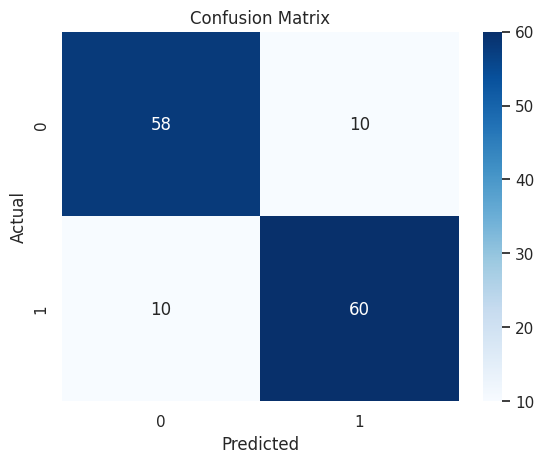

In [26]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 Interpretation
The model performs consistently well across both classes, with balanced precision, recall, and F1-score.

An accuracy of 85.5% indicates that the logistic regression model correctly classifies the credit approval status for the majority of cases.

The close values across precision and recall suggest low bias and low variance, indicating stable generalization.
